/usr/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


importing Jupyter notebook from planta.ipynb
R2a = 33000.0
R2b = 39000.0
R1 = 17875.0
R1 = 68000.0
C1 = 7e-07
C2 = 1e-07
wn = 17.254152413997854

        1.175e+04
-------------------------
s^2 + 100.9 s + 1.175e+04

T.size: 100
T.shape: (100,)
yout.size: 100
yout.shape: (100,)
{
    "RiseTime": 0.014011321365033157,
    "SettlingTime": 0.049039624777616045,
    "SettlingMin": 0.9277838533587892,
    "SettlingMax": 1.1913022492293326,
    "Overshoot": 19.24899706442737,
    "Undershoot": 0.0,
    "Peak": 1.1913022492293326,
    "PeakTime": 0.03222603913957626,
    "SteadyStateValue": 0.9990039988224811
}
v0 = 1.0 v
vinf = 1.49 v
deltav = 0.49 v
v10 = 1.049 v
v90 = 1.441 v
t10 = 0.0048 s
t90 = 0.0198 s
RiseTime = 0.015000000000000003 s
deltav = 0.49 v
v50 = 1.245 v
Delay = 0.012 s
PeakTime = 0.0334 s
PeakValue = 1.57 v
OverShoot = 16.326530612244913 %
sup_margin = 1.5145 v
inf_margin = 1.4655 v
SettlingTime = 0.0476 s
zeta = 0.4997062054306522
wn = 108.58948003681807
zeta_check = 0.4997

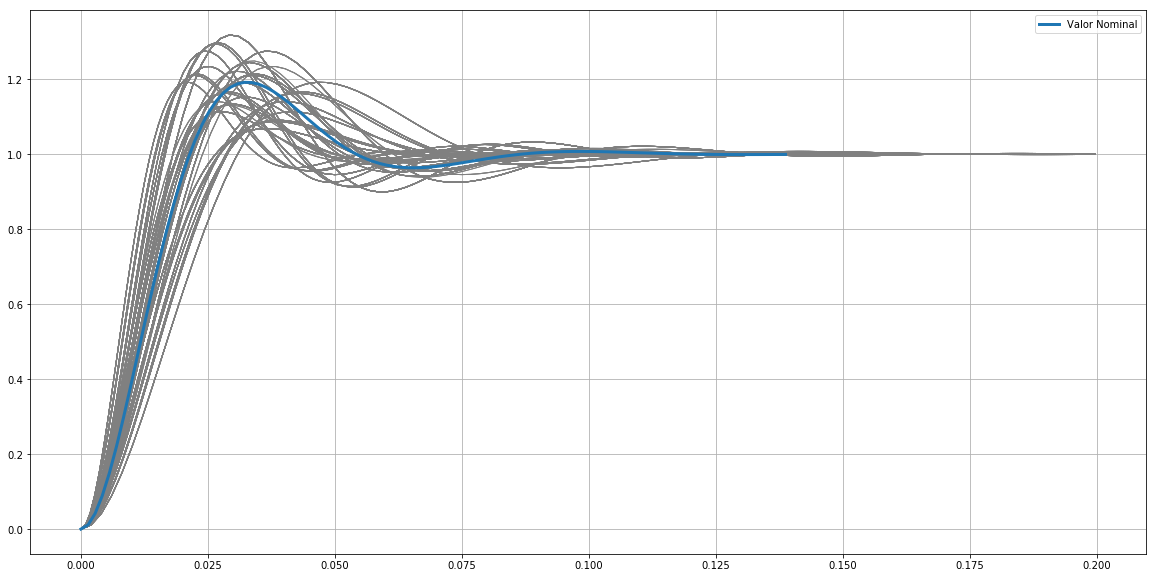

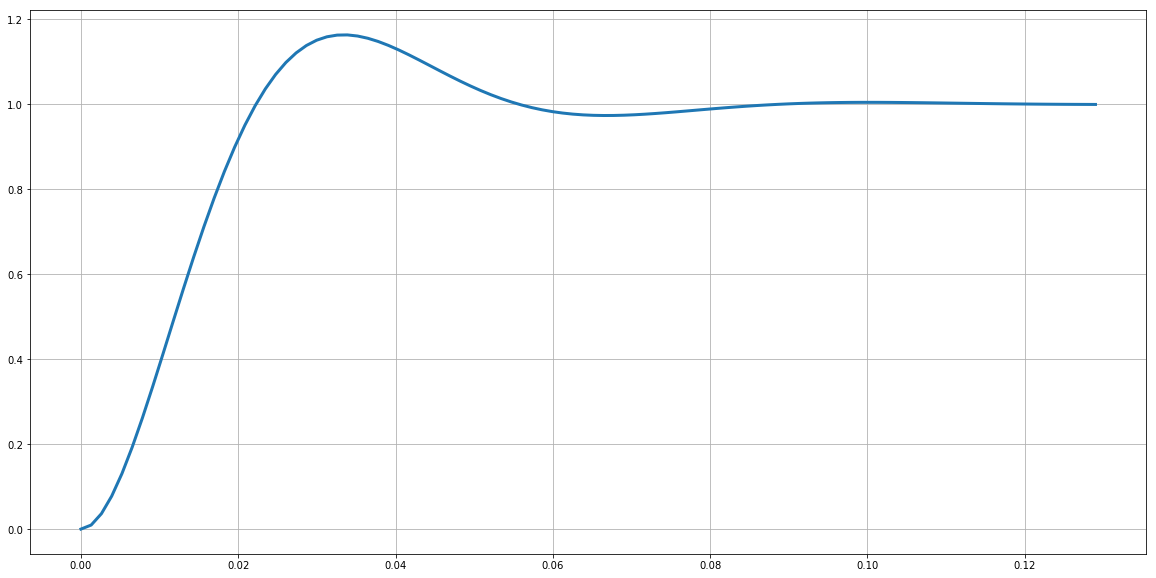

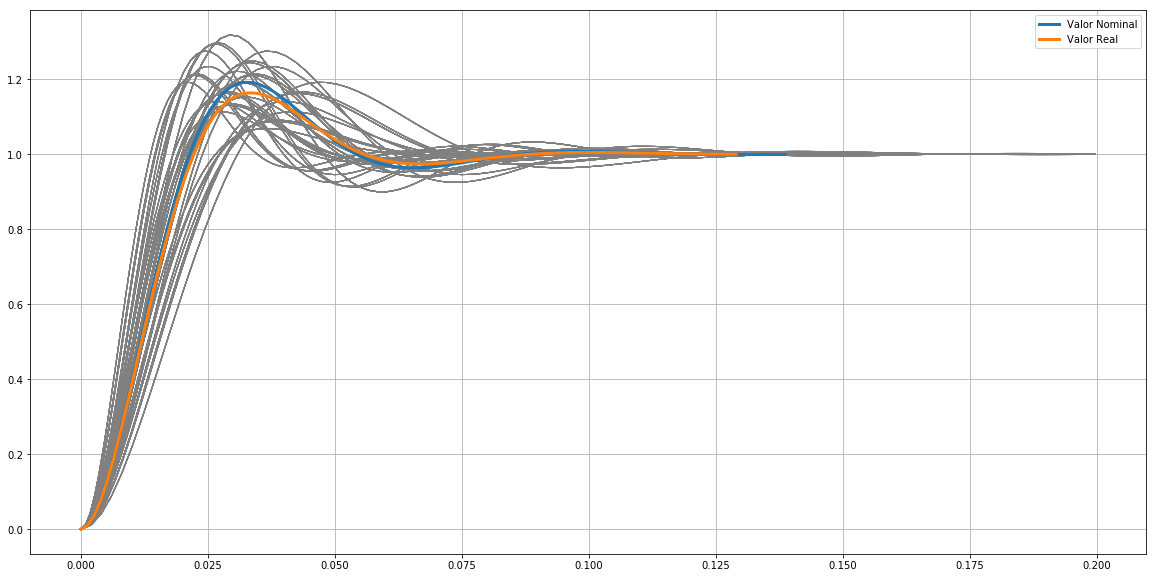

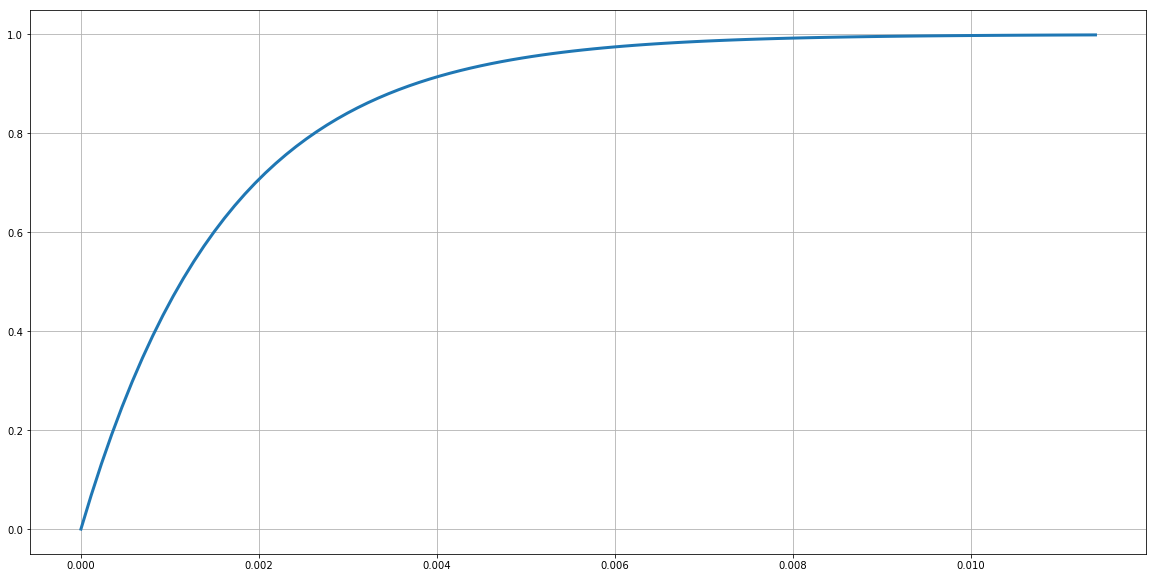

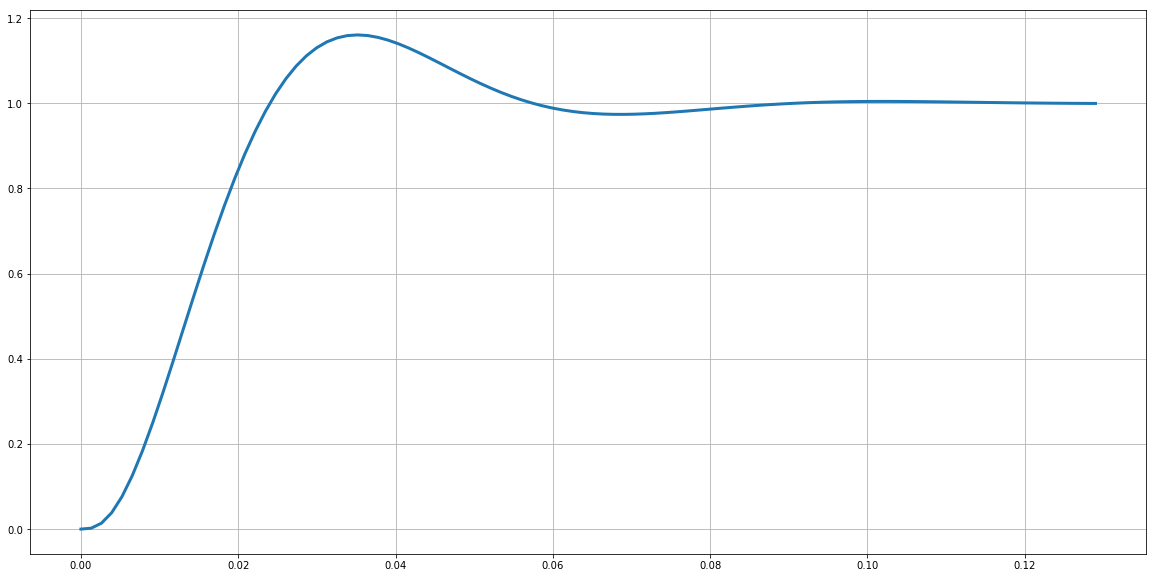

In [1]:
import import_ipynb
from planta import *

# autoreload sets up auto reloading of modified .py modules
import autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
print('')

# 4 PROJETO DE CONTROLADOR COM LUGAR DAS RAÍZES
Especificações mínimas da resposta ao degrau:
Degrau dde referência de 1,0 à 1,5 V:
- Ts5% e Mp com metade do valor obtido em malha aberta;  
- Erro nulo em regime permanente para resposta ao degrau;  
- Estabilidade.


In [2]:
Req = {
    'SettlingTime': S['SettlingTime']/2,
    'Overshoot': S['Overshoot']/2,
}
print(f'Requisitos do projeto {json.dumps(Req, indent=4)}')

Requisitos do projeto {
    "SettlingTime": 0.025409432210630592,
    "Overshoot": 8.050719189664607
}


In [3]:
fom = FOM(Req, SettlingTimeThreshold)
print(f'FOM: {json.dumps(fom, indent=4)}')

FOM: {
    "zeta": 0.625623484936367,
    "wn": 204.06911710315973,
    "Fn": 1282.2040782316835,
    "wd": 159.19945130113828,
    "Fd": 1000.2796533263642
}


## Testando local do polo dominante desejado

G_test = 
        4.164e+04
-------------------------
s^2 + 255.3 s + 4.164e+04

T.size: 100
T.shape: (100,)
yout.size: 100
yout.shape: (100,)
{
    "RiseTime": 0.010424382445386909,
    "SettlingTime": 0.026060956113467273,
    "SettlingMin": 0.9583677853631275,
    "SettlingMax": 1.0804470089409501,
    "Overshoot": 8.044706063997465,
    "Undershoot": 0.0,
    "Peak": 1.0804470089409501,
    "PeakTime": 0.019545717085100455,
    "SteadyStateValue": 0.99999995215034
}
{
    "SettlingTime": 0.025409432210630592,
    "Overshoot": 8.050719189664607
}


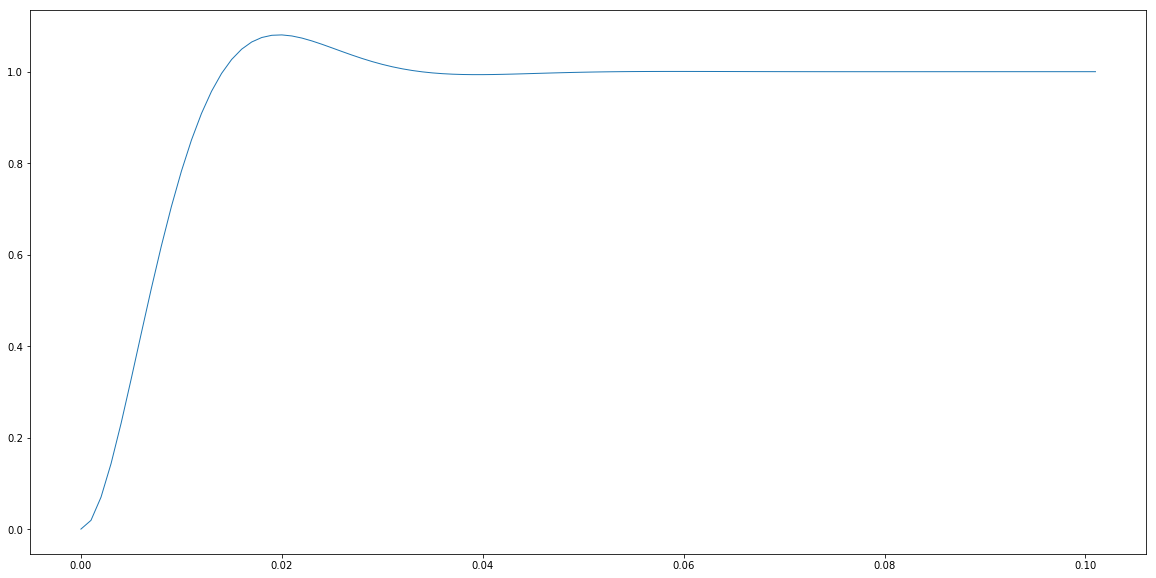

In [4]:
G_test = tf([fom['wn']**2], [1, 2 * fom['zeta'] * fom['wn'], fom['wn']**2])
print(f'G_test = {G_test}')
final_time = 2 * S['SettlingTime']
T = np.arange(final_time / 1E-3) * 1E-3
yout, T = step(G_test, T)
plt.figure(figsize=(20,10))
plt.plot(T, yout)
S_test = stepinfo(G_test, t, SettlingTimeThreshold=SettlingTimeThreshold)
print(json.dumps(S_test, indent=4))
print(json.dumps(Req, indent=4))

# Localização dos Polos dominantes desejados considerando fator de projeto

In [5]:
fator_adicional = 0# 0.25 # 0.08
fator_de_projeto_settling_time = np.abs(fator_adicional + (S_test['SettlingTime'] -Req['SettlingTime']) / Req['SettlingTime'])
fator_de_projeto_overshoot = np.abs((fator_adicional*20 + S_test['Overshoot'] -Req['Overshoot']) / Req['Overshoot'])
print(f'Fator de projeto para o SettlingTime: {100 * fator_de_projeto_settling_time} %')
print(f'Fator de projeto para o Overshoot: {100 * fator_de_projeto_overshoot} %')
ReqFact = {
    'SettlingTime': Req['SettlingTime'] * (1 - fator_de_projeto_settling_time),
    'Overshoot': Req['Overshoot'] * (1 - fator_de_projeto_overshoot),
}
print(f'Requisitos com fator {json.dumps(ReqFact, indent=4)}')

Fator de projeto para o SettlingTime: 2.5641025641025625 %
Fator de projeto para o Overshoot: 0.07469054037881996 %
Requisitos com fator {
    "SettlingTime": 0.02475790830779391,
    "Overshoot": 8.044706063997465
}


In [6]:
fom = FOM(ReqFact, SettlingTimeThreshold)
print(f'FOM: {json.dumps(fom, indent=4)}')

FOM: {
    "zeta": 0.6257363852614588,
    "wn": 209.40906145694285,
    "Fn": 1315.7559381365304,
    "wd": 163.3463133507129,
    "Fd": 1026.335156027152
}


G_test = 
        4.385e+04
-------------------------
s^2 + 262.1 s + 4.385e+04

T.size: 100
T.shape: (100,)
yout.size: 100
yout.shape: (100,)
{
    "RiseTime": 0.009121334639713544,
    "SettlingTime": 0.02475790830779391,
    "SettlingMin": 0.9103241836393264,
    "SettlingMax": 1.0802789387235257,
    "Overshoot": 8.027894026813252,
    "Undershoot": 0.0,
    "Peak": 1.0802789387235257,
    "PeakTime": 0.019545717085100455,
    "SteadyStateValue": 0.9999999985701777
}
{
    "SettlingTime": 0.025409432210630592,
    "Overshoot": 8.050719189664607
}


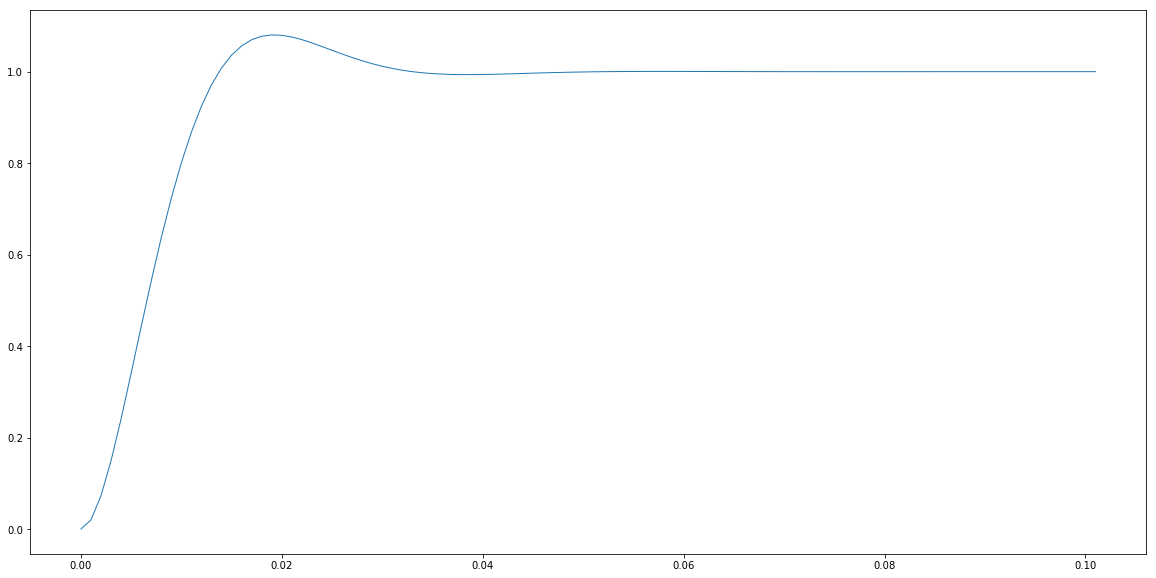

In [7]:
G_test_fact =  tf([fom['wn']**2], [1, 2 * fom['zeta'] * fom['wn'], fom['wn']**2])
print(f'G_test = {G_test_fact}')
final_time = 2 * S['SettlingTime']
T = np.arange(final_time / 1E-3) * 1E-3
yout, T = step(G_test_fact, T)
plt.figure(figsize=(20,10))
plt.plot(T, yout)
S_test_fact = stepinfo(G_test_fact, t, SettlingTimeThreshold=SettlingTimeThreshold)
print(json.dumps(S_test_fact, indent=4))
print(json.dumps(Req, indent=4))

## Período de amostragem

In [8]:
# calcula o ws recomendado com base nas razões recomendadas de ws/wd
w_ratio = np.array([10, 15])
ws = w_ratio * fom['wd']
print(f"Para um limites de 8 a 10 vezes, wd = {fom['wd']} rad/s")
Ts = 2 * np.pi / ws
Fs = 1 / Ts
# Fs = round(np.mean(2 * np.ceil(Fs / 2)))
# Fs = 2**np.ceil(np.log2(np.mean(Fs))) * 2
Fs = 1000
print(f'Considerando uma média na potência de 2 temos Fs = {Fs} Hz')
Ts = 1 / Fs
print(f'Ts = {round(Ts, 5)} s')
ws = 2 * np.pi * Fs
print(f'ws = {round(ws, 2)} rad/s')
print(ws/fom['wd'])

Para um limites de 8 a 10 vezes, wd = 163.3463133507129 rad/s
Considerando uma média na potência de 2 temos Fs = 1000 Hz
Ts = 0.001 s
ws = 6283.19 rad/s
38.46542464468889


Obtemos a função de transferência pulsada ($ G_z $):

In [9]:
print(f'G_s = {G_s}')
G_z = c2d(G_s, Ts)
print(f'G_z = {G_z}')

G_s = 
                7.239e+06
-----------------------------------------
s^3 + 722.4 s^2 + 7.841e+04 s + 7.239e+06

G_z = 
0.001013 z^2 + 0.003402 z + 0.0007061
-------------------------------------
  z^3 - 2.427 z^2 + 1.918 z - 0.4856

dt = 0.001



Verificando resposta ao impulso comparativamente com a função de transferência contínua:

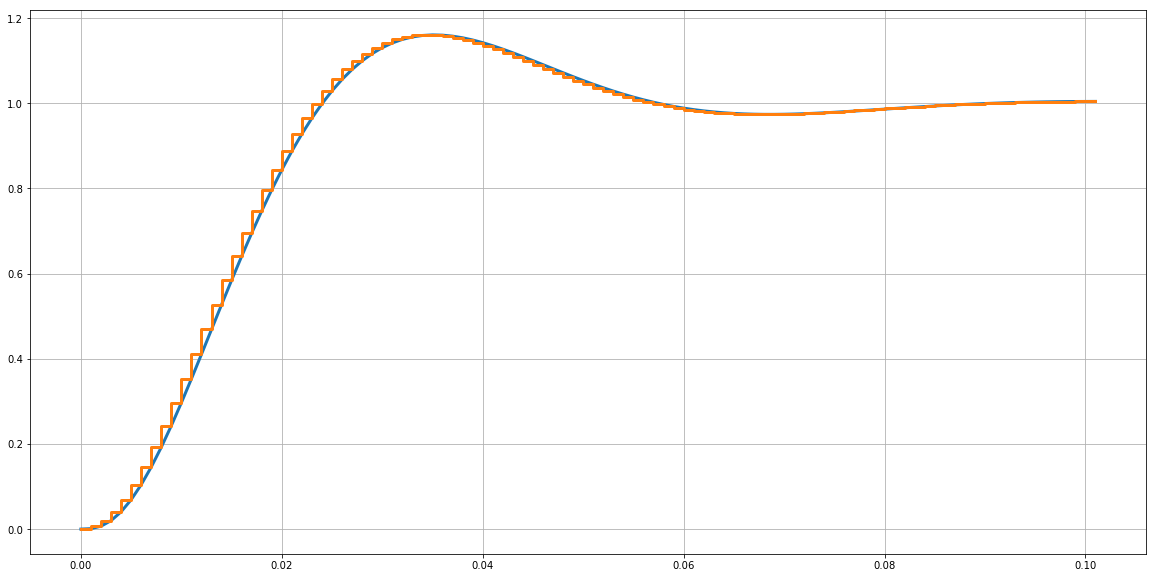

In [10]:
final_time = 2 * S['SettlingTime']
T = np.arange(final_time / Ts) * Ts
yout, T = step(G_s, T)
plt.figure(figsize=(20,10))
plt.plot(T, yout, lw=3)
yout, T = step(G_z, T)
plt.step(T, yout,lw=3)
plt.grid()

Pólo P1 -> [0.8771871870799707, 9.359054354017301°]
Pólo P1 -> (0.8655106224179596+0.14264895253365076j)

          1
----------------------
z^2 - 1.731 z + 0.7695

dt = 0.001



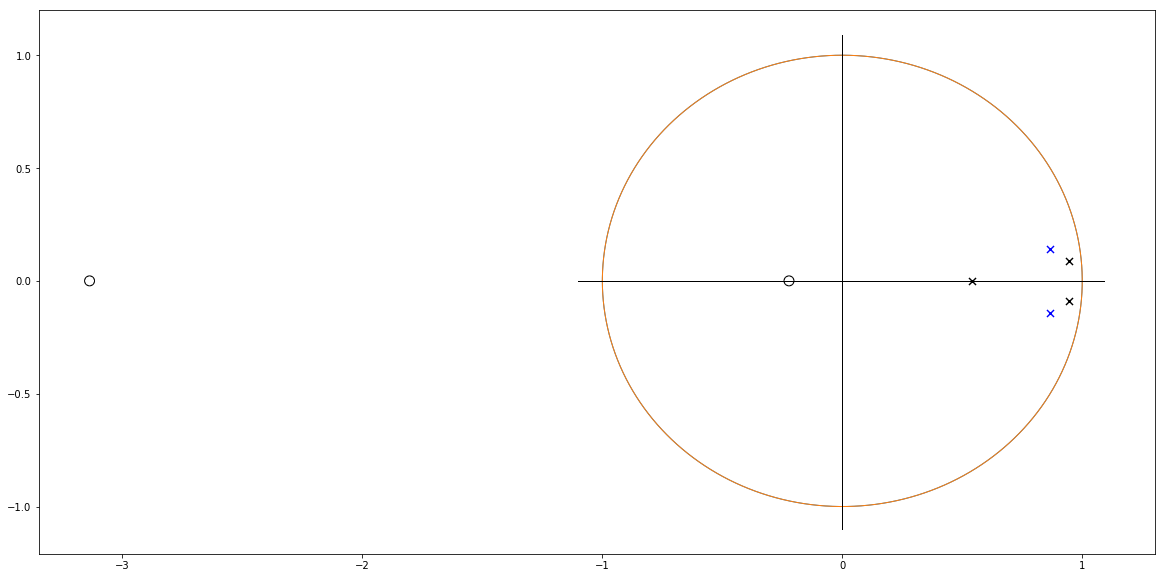

In [13]:
# Representação polar
p1_r = np.exp(-Ts * fom['zeta'] * fom['wn'])
p1_theta = np.degrees(Ts * fom['wd'])
print(f'Pólo P1 -> [{p1_r}, {p1_theta}°]')

# Representação retangular
p1 = p1_r * np.exp(1j * Ts * fom['wd'])
print(f'Pólo P1 -> {p1}')

polo_dominante_desejado = tf(1, np.poly([p1, p1.conjugate()]), Ts)
print(polo_dominante_desejado)
plt.figure(figsize=(20,10))
zplane(polo_dominante_desejado, color='blue')
zplane(G_z)
